In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("./Carseats.csv")
df = pd.get_dummies(df)
print(df.shape)
df.head(3)

(400, 15)


,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1


In [3]:
df = (df - df.mean()) / df.std()

# (B)

PC1     1.861358e-01
PC2     1.405399e-01
PC3     1.179220e-01
PC4     1.116091e-01
PC5     1.085072e-01
PC6     7.379250e-02
PC7     6.945572e-02
PC8     6.603772e-02
PC9     5.776038e-02
PC10    4.131997e-02
PC11    2.352606e-02
PC12    3.393730e-03
PC13    2.806588e-33
PC14    9.143295e-34
PC15    4.297070e-34
dtype: float64


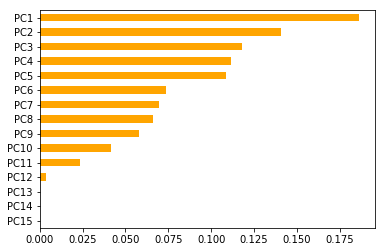

In [4]:
n_comp = df.shape[1]
cols = ['PC'+str(i+1) for i in range(n_comp)]
pca = PCA(n_components=n_comp)
pca.fit(df)
PVE = pd.Series(pca.explained_variance_ratio_, index=cols)
print(PVE)
PVE.sort_values().plot.barh(color='orange')

In [5]:
PVE.sum()

1.0000000000000002

In [6]:
df_loadings = pd.DataFrame(pca.components_,columns= df.columns, index=cols)
print(df_loadings.shape)
df_loadings.round(2)

(15, 15)


,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
PC1,-0.27,-0.01,-0.10,-0.49,-0.12,0.01,0.04,0.08,0.05,-0.18,0.11,0.08,-0.08,0.55,-0.55
PC2,0.27,-0.17,-0.01,0.01,0.08,-0.24,-0.04,0.01,-0.26,0.18,0.07,0.60,-0.60,0.03,-0.03
PC3,0.41,-0.21,0.13,-0.15,-0.02,-0.38,-0.08,-0.05,0.06,0.46,-0.43,-0.24,0.24,0.20,-0.20
PC4,-0.28,0.05,0.01,-0.01,0.09,0.19,-0.06,0.02,0.61,0.09,-0.60,0.25,-0.25,-0.05,0.05
PC5,0.18,0.59,-0.14,-0.08,-0.13,0.50,-0.24,0.05,-0.28,0.40,-0.09,0.02,-0.02,0.07,-0.07
PC6,-0.09,-0.06,-0.11,-0.07,-0.61,-0.06,0.52,0.48,-0.07,0.19,-0.10,0.03,-0.03,-0.14,0.14
PC7,-0.16,-0.11,-0.57,0.07,0.43,0.07,0.51,-0.27,-0.16,0.27,-0.08,-0.05,0.05,0.05,-0.05
PC8,-0.07,0.08,0.54,-0.15,-0.23,0.14,0.39,-0.65,-0.08,0.09,-0.01,0.06,-0.06,-0.02,0.02
PC9,-0.01,0.07,0.55,0.13,0.50,0.17,0.32,0.50,-0.09,0.09,0.01,-0.02,0.02,0.13,-0.13
PC10,-0.39,-0.64,0.12,-0.07,-0.05,0.36,-0.34,0.04,-0.28,0.29,0.00,-0.04,0.04,-0.06,0.06


In [7]:
df_scores = pd.DataFrame(pca.transform(df),columns=cols)
print(df_scores.shape)
df_scores.round(2)

(400, 15)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,-1.32,-1.39,0.33,1.38,0.12,0.05,-1.23,-1.27,0.26,-1.02,-0.03,0.47,0.0,0.0,-0.0
1,-2.46,0.41,2.31,-0.54,-0.34,0.39,1.72,0.45,-1.03,-0.07,0.69,-0.33,0.0,-0.0,0.0
2,-1.17,0.02,0.23,-1.81,-1.32,0.01,0.78,-0.53,-1.30,-0.58,-0.17,0.13,0.0,-0.0,0.0
3,-0.81,-0.36,-0.08,-1.23,-1.30,-0.76,-0.17,0.16,0.97,0.26,-1.36,-0.24,0.0,-0.0,0.0
4,1.90,-1.88,0.43,1.81,0.43,-1.42,-0.12,-0.32,-0.06,-0.47,0.34,-0.44,-0.0,0.0,-0.0
5,-1.54,2.02,0.38,1.94,-2.24,0.16,-0.47,0.12,1.88,-2.24,-0.29,0.15,0.0,0.0,-0.0
6,2.24,-0.66,0.54,-1.57,-0.74,1.12,-0.83,1.13,0.68,0.27,0.47,0.11,0.0,0.0,0.0
7,-2.69,-0.10,1.61,-0.13,1.12,-0.57,1.49,1.23,0.57,-0.59,0.26,-0.00,-0.0,-0.0,0.0
8,2.36,1.63,-0.93,-0.29,0.10,0.09,-0.34,2.96,0.26,-0.54,0.55,0.10,0.0,0.0,0.0
9,0.44,1.35,-2.13,0.18,-0.22,1.91,-1.17,1.35,1.19,0.07,-1.14,-0.21,0.0,0.0,0.0


# Bi Plot

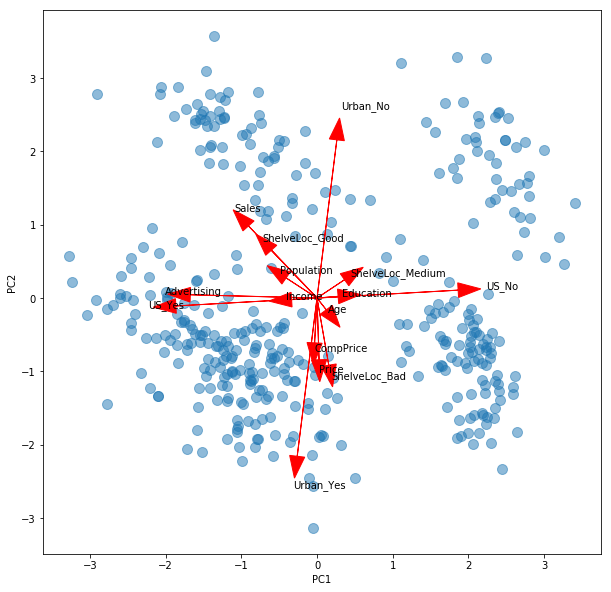

In [8]:
df_scores.plot.scatter(x='PC1',y='PC2',alpha=0.5,s=100,figsize=(10,10))
x_scale = df_scores['PC1'].abs().max()
y_scale = df_scores['PC2'].abs().max()
for k in range(df.shape[1]):
    x = x_scale*df_loadings.iloc[0,k]
    y = y_scale*df_loadings.iloc[1,k]
    plt.arrow(0,0,x,y,head_width=0.2,color='red')
    x=1.2*x
    y=1.2*y
    plt.text(x,y,df.columns[k],color='black')